## PLEASE READ: DATA DOWNLOAD

#### Make sure to run the `preprocess_urban_landmarks.ipynb` notebook in `notebooks/preprocessing/` before running this one

## Import Libraries 

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import contextily as ctx
import seaborn as sns
import os 
import folium
from branca.element import Template, MacroElement


#### Read Files

In [3]:
landuse_gdf = gpd.read_file('../../data/raw/urban_landmarks_shp/landuse_df.gpkg')
natural_gdf = gpd.read_file('../../data/raw/urban_landmarks_shp/natural_df.gpkg')
pofw_gdf = gpd.read_file('../../data/raw/urban_landmarks_shp/pofw_df.gpkg')
pois_gdf = gpd.read_file('../../data/raw/urban_landmarks_shp/pois_df.gpkg')
roads_gdf = gpd.read_file('../../data/raw/urban_landmarks_shp/roads_df.gpkg')

all_properties = pd.read_csv('../../data/curated/merged_feature_set/all_properties_merged.csv')
urban_landmarks = pd.read_csv('../../data/curated/urban_landmarks.csv')

In [4]:
all_properties.head()

suburb  year  dec_median  jun_median  mar_median  sep_median  \
0  abbotsford  2016       450.0       450.0       450.0       450.0   
1  abbotsford  2017       480.0       460.0       450.0       465.0   
2  abbotsford  2018       490.0       480.0       480.0       480.0   
3  abbotsford  2019       500.0       500.0       495.0       500.0   
4  abbotsford  2020       460.0       495.0       500.0       480.0   

   offence_division_1  offence_division_2  offence_division_3  \
0               107.0              1065.0                76.0   
1               138.0              1019.0                64.0   
2               100.0              1162.0                88.0   
3               175.0              1053.0               178.0   
4               145.0               985.0               151.0   

   offence_division_4  ...  distance_to_restaurant  distance_to_supermarket  \
0                59.0  ...                1.141601                 1.083238   
1                69.0  ...                1.141601                 1.083238   
2                84.0  ...                1.141601                 1.083238   
3               114.0  ...                1.141601                 1.083238   
4                89.0  ...                1.141601                 1.083238   

   nearest_transport_avg_distance  distance_to_cbd  median_bath  \
0                            1.11             5.55            1   
1                            1.11             5.55            1   
2                            1.11             5.55            1   
3                            1.11             5.55            1   
4                            1.11             5.55            1   

   median_parkings  furnished_count  unfurnished_count  pets_allowed  \
0                1                5                 54            11   
1                1                5                 54            11   
2                1                5                 54            11   
3                1                5                 54            11   
4                1                5                 54            11   

   pets_not_allowed  
0                48  
1                48  
2                48  
3                48  
4                48  

[5 rows x 88 columns]

In [5]:
plot_directory = '../../plots/urban_landmarks_visualisations'

if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

-----

## Visualisations

#### Map Visualisations

Landuse

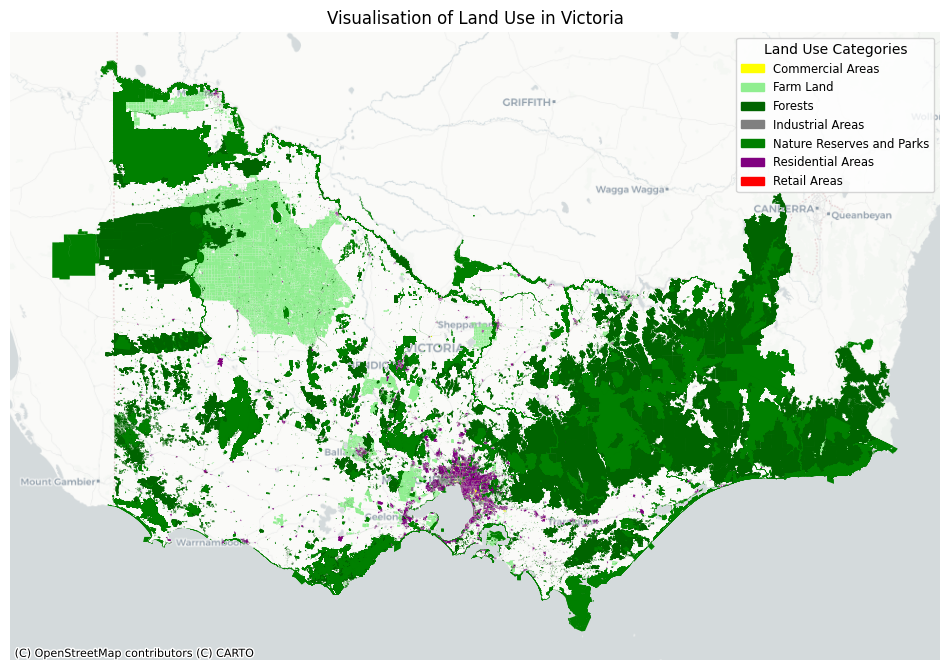

In [6]:
# Define the list of feature_class features to include
include_features = ['park', 'forest', 'industrial_areas', 'retail_areas',
       'residential_areas', 'nature_reserve', 'commercial_areas',
       'farmland']

# Filter the GeoDataFrame to include only the specified features
filtered_gdf = landuse_gdf[landuse_gdf['feature_class'].isin(include_features)]

# Replace feature_class values with new combined labels
filtered_gdf['feature_class_combined'] = filtered_gdf['feature_class'].replace({
    'commercial_areas': 'Commercial Areas',
    'farmland': 'Farm Land',
    'forest': 'Forests',
    'industrial_areas': 'Industrial Areas',
    'nature_reserve': 'Nature Reserves and Parks',
    'park': 'Nature Reserves and Parks',
    'residential_areas': 'Residential Areas',
    'retail_areas': 'Retail Areas'
})

# Define a color mapping for the specified combined feature_class features
color_mapping = {
    'Commercial Areas': 'yellow',
    'Farm Land': 'lightgreen',
    'Forests': '#006400',
    'Industrial Areas': 'grey',
    'Nature Reserves and Parks': 'green',
    'Residential Areas': 'purple',
    'Retail Areas': 'red'
}

# Create a color column based on the combined feature class
filtered_gdf['color'] = filtered_gdf['feature_class_combined'].map(color_mapping)

# Convert the CRS to Web Mercator for compatibility with contextily basemaps
filtered_gdf = filtered_gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_gdf.plot(ax=ax, color=filtered_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=feature_class) for feature_class, color in color_mapping.items()]
# Adjusting the size of the legend by specifying fontsize
plt.legend(handles=legend_patches, title='Land Use Categories', loc='upper right', fontsize='small')

# Add title and hide the axis
plt.title('Visualisation of Land Use in Victoria', fontsize='large')
plt.axis('off')  # Hide the axis

# Save the figure
plt.savefig(os.path.join('../../plots/urban_landmarks_visualisations', 'Landuse_Vic.png'), bbox_inches='tight', pad_inches=0.25)

# Show the plot
plt.show()


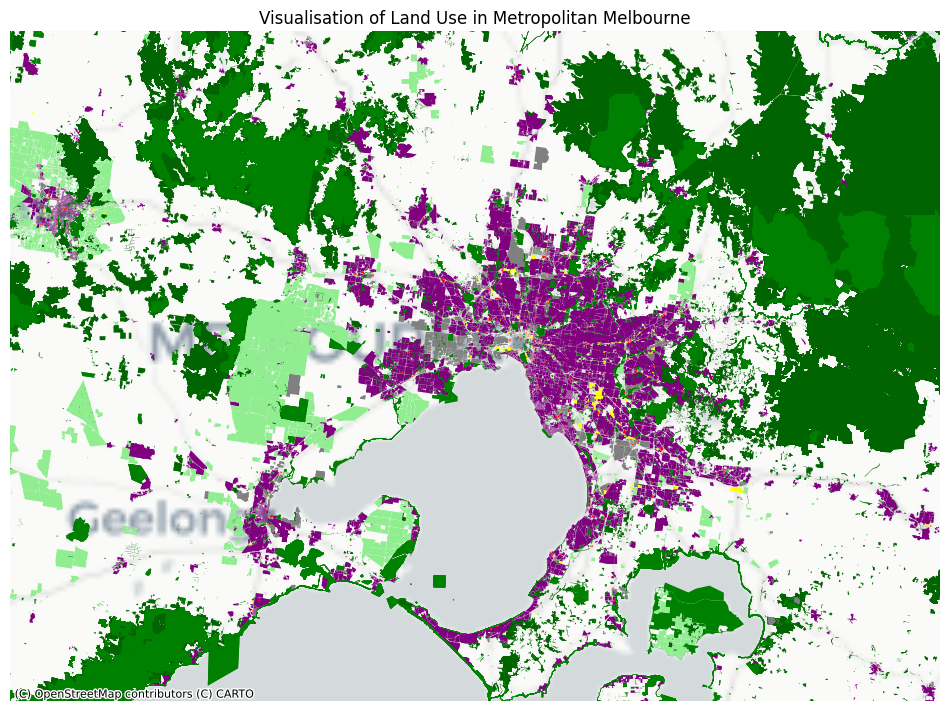

In [7]:
# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_gdf.plot(ax=ax, color=filtered_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Set the axis limits to zoom into the specified region
# 1.61e7 to 1.62e7 on the x-axis and around -4.5e6 on the y-axis
ax.set_xlim([1.60e7, 1.625e7])  # x-axis limits
ax.set_ylim([-4.65e6, -4.47e6])  # y-axis limits

# Add title and hide the axis
plt.title('Visualisation of Land Use in Metropolitan Melbourne', fontsize='large')
plt.axis('off')  # Hide the axis

# Save the figure without white margins
plt.savefig(os.path.join('../../plots/urban_landmarks_visualisations', 'Landuse_Melb.png'), bbox_inches='tight', pad_inches=0.25)

# Show the plot
plt.show()

##### Analysis Stats for the Maps (Rental Prices)

In [8]:
# Map 1

# Find median rental prices from horsham (Western Regional Subrub)
# and wangaratta (Eastern Regional Suburb) 

# Filter data for horsham and calculate the median rental prices for horsham
horsham_df = all_properties[all_properties['suburb'] == 'horsham']
horsham_median_rental_prices = horsham_df[['dec_median', 'jun_median', 'mar_median', 'sep_median']].median()
print(horsham_median_rental_prices.median())

# Filter data for wangaratta and calculate the median rental prices for wangaratta
wangaratta_df = all_properties[all_properties['suburb'] == 'wangaratta']
wangaratta_median_rental_prices = wangaratta_df[['dec_median', 'jun_median', 'mar_median', 'sep_median']].median()
print(wangaratta_median_rental_prices.median())

# Filter data for melbourne and calculate the median rental prices for melbourne
melbourne_df = all_properties[all_properties['suburb'] == 'melbourne']
melbourne_median_rental_prices = melbourne_df[['dec_median', 'jun_median', 'mar_median', 'sep_median']].median()
print(melbourne_median_rental_prices.median())

280.0
300.0
504.0


In [9]:
# Map 2

# Find median rental prices from melton (West Melbourne)
# and Wantirna (East Melbourne) 

# Filter data for melton and calculate the median rental prices for melton
melton_df = all_properties[all_properties['suburb'] == 'melton']
melton_median_rental_prices = melton_df[['dec_median', 'jun_median', 'mar_median', 'sep_median']].median()
print(melton_median_rental_prices.median())

# Filter data for wantirna and calculate the median rental prices for wantirna
wantirna_df = all_properties[all_properties['suburb'] == 'wantirna']
wantirna_median_rental_prices = wantirna_df[['dec_median', 'jun_median', 'mar_median', 'sep_median']].median()
print(wantirna_median_rental_prices.median())


347.5
446.5


##### Places of Worship

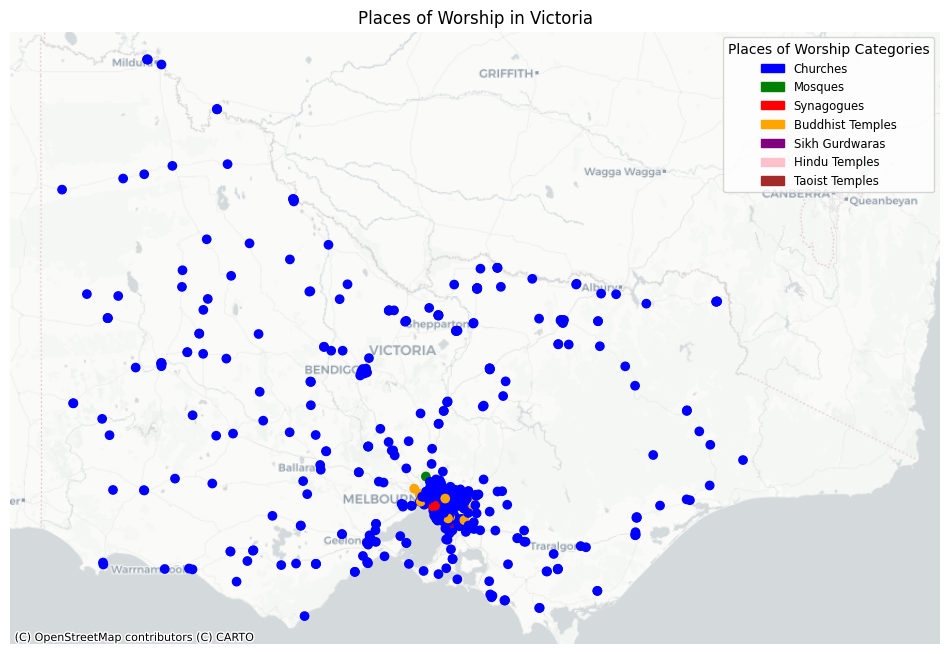

In [10]:
# Dictionary of categories of places of worship
pofw_categories = {
    "churches": ['christian', 'christian_anglican', 'christian_catholic', 
                 'christian_lutheran', 'christian_orthodox', 'christian_evangelical', 
                 'christian_protestant', 'christian_methodist'],
    "mosques": ['muslim', 'muslim_sunni', 'muslim_shia'],
    "synagogues": ['jewish'],
    "buddhist_temples": ['buddhist'],
    "sikh_gurdwaras": ['sikh'],
    "hindu_temples": ['hindu'],
    "taoist_temples": ['taoist']
}

# Create a reverse mapping from feature_class to pofw_category
feature_to_pofw = {}
for category, features in pofw_categories.items():
    for feature in features:
        feature_to_pofw[feature] = category

# Map the feature_class to their respective pofw_category
pofw_gdf['pofw_category'] = pofw_gdf['feature_class'].map(feature_to_pofw)

# Filter out rows where pofw_category is not set
filtered_pofw_gdf = pofw_gdf.dropna(subset=['pofw_category'])

# Define a color mapping for each pofw_category
color_mapping = {
    'Churches': 'blue',
    'Mosques': 'green',
    'Synagogues': 'red',
    'Buddhist Temples': 'orange',
    'Sikh Gurdwaras': 'purple',
    'Hindu Temples': 'pink',
    'Taoist Temples': 'brown'
}

# You can apply a transformation to capitalize and replace underscores in the 'pofw_category' column
filtered_pofw_gdf['pofw_category'] = filtered_pofw_gdf['pofw_category'].apply(lambda x: x.replace('_', ' ').title())

# Create a color column based on the pofw_category
filtered_pofw_gdf['color'] = filtered_pofw_gdf['pofw_category'].map(color_mapping)

# Convert the CRS to Web Mercator for compatibility with contextily basemaps
filtered_pofw_gdf = filtered_pofw_gdf.to_crs(epsg=3857)

# Plotting
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all geometries at once with the corresponding colors
filtered_pofw_gdf.plot(ax=ax, color=filtered_pofw_gdf['color'], legend=True)

# Add basemap using contextily with a reliable provider
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)  # Use CartoDB Positron as the basemap

# Manually create legend patches
legend_patches = [mpatches.Patch(color=color, label=pofw) for pofw, color in color_mapping.items()]
plt.legend(handles=legend_patches, title='Places of Worship Categories', loc='upper right', fontsize='small')

# Add title and hide the axis
plt.title('Places of Worship in Victoria', fontsize='large')
plt.axis('off')  # Hide the axis

# Save the figure
plt.savefig(os.path.join('../../plots/urban_landmarks_visualisations', 'POFW_Vic.png'), bbox_inches='tight', pad_inches=0.25)

# Show the plot
plt.show()

In [11]:
# Ensure the GeoDataFrame is in WGS 84 CRS (EPSG:4326) for folium compatibility
filtered_pofw_gdf = filtered_pofw_gdf.to_crs(epsg=4326)

# Create a Folium map centered around Victoria (adjust the center coordinates as needed)
m = folium.Map(location=[-37.4713, 144.7852], zoom_start=8)

# Define a color mapping for the categories
marker_color_mapping = {
    'Churches': 'blue',
    'Mosques': 'green',
    'Synagogues': 'red',
    'Buddhist Temples': 'orange',
    'Sikh Gurdwaras': 'purple',
    'Hindu Temples': 'pink',
    'Taoist Temples': 'brown'
}

# Iterate over the rows of the GeoDataFrame to add CircleMarkers (dots)
for idx, row in filtered_pofw_gdf.iterrows():
    # Get the centroid of the polygon as coordinates
    centroid = row.geometry.centroid
    coords = [centroid.y, centroid.x]  # folium expects [lat, lon]

    # Get the category and corresponding color
    category = row['pofw_category']
    marker_color = marker_color_mapping.get(category, 'gray')  # Use 'gray' if no color found

    # Add a circle marker for each place of worship
    folium.CircleMarker(
        location=coords,
        radius=5,  # You can adjust the radius to make the dots bigger or smaller
        color=marker_color,
        fill=True,
        fill_color=marker_color,
        fill_opacity=0.7,
        popup=f"{category}"  # Display category on click
    ).add_to(m)

# Add a custom legend using HTML/CSS
legend_html = '''
     <div style="position: fixed; 
     bottom: 50px; left: 50px; width: 250px; height: 300px; 
     background-color: white; border:2px solid grey; z-index:9999; font-size:14px;
     ">&nbsp; <strong>Legend</strong><br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:blue"></i>&nbsp; Churches<br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:green"></i>&nbsp; Mosques<br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:red"></i>&nbsp; Synagogues<br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:orange"></i>&nbsp; Buddhist Temples<br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:purple"></i>&nbsp; Sikh Gurdwaras<br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:pink"></i>&nbsp; Hindu Temples<br>
     &nbsp; <i class="fa fa-circle fa-2x" style="color:brown"></i>&nbsp; Taoist Temples<br>
     </div>
     '''
# Add the HTML legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control (optional, if you plan to add multiple layers)
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('../../plots/urban_landmarks_visualisations/POFW_Vic.html')

# Display the map
m


#### Histograms

/var/folders/03/crp2bz8918l1tgr0vbt4jgfh0000gn/T/ipykernel_10619/1541531536.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_suburbs_per_category = category_counts.groupby('categories').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


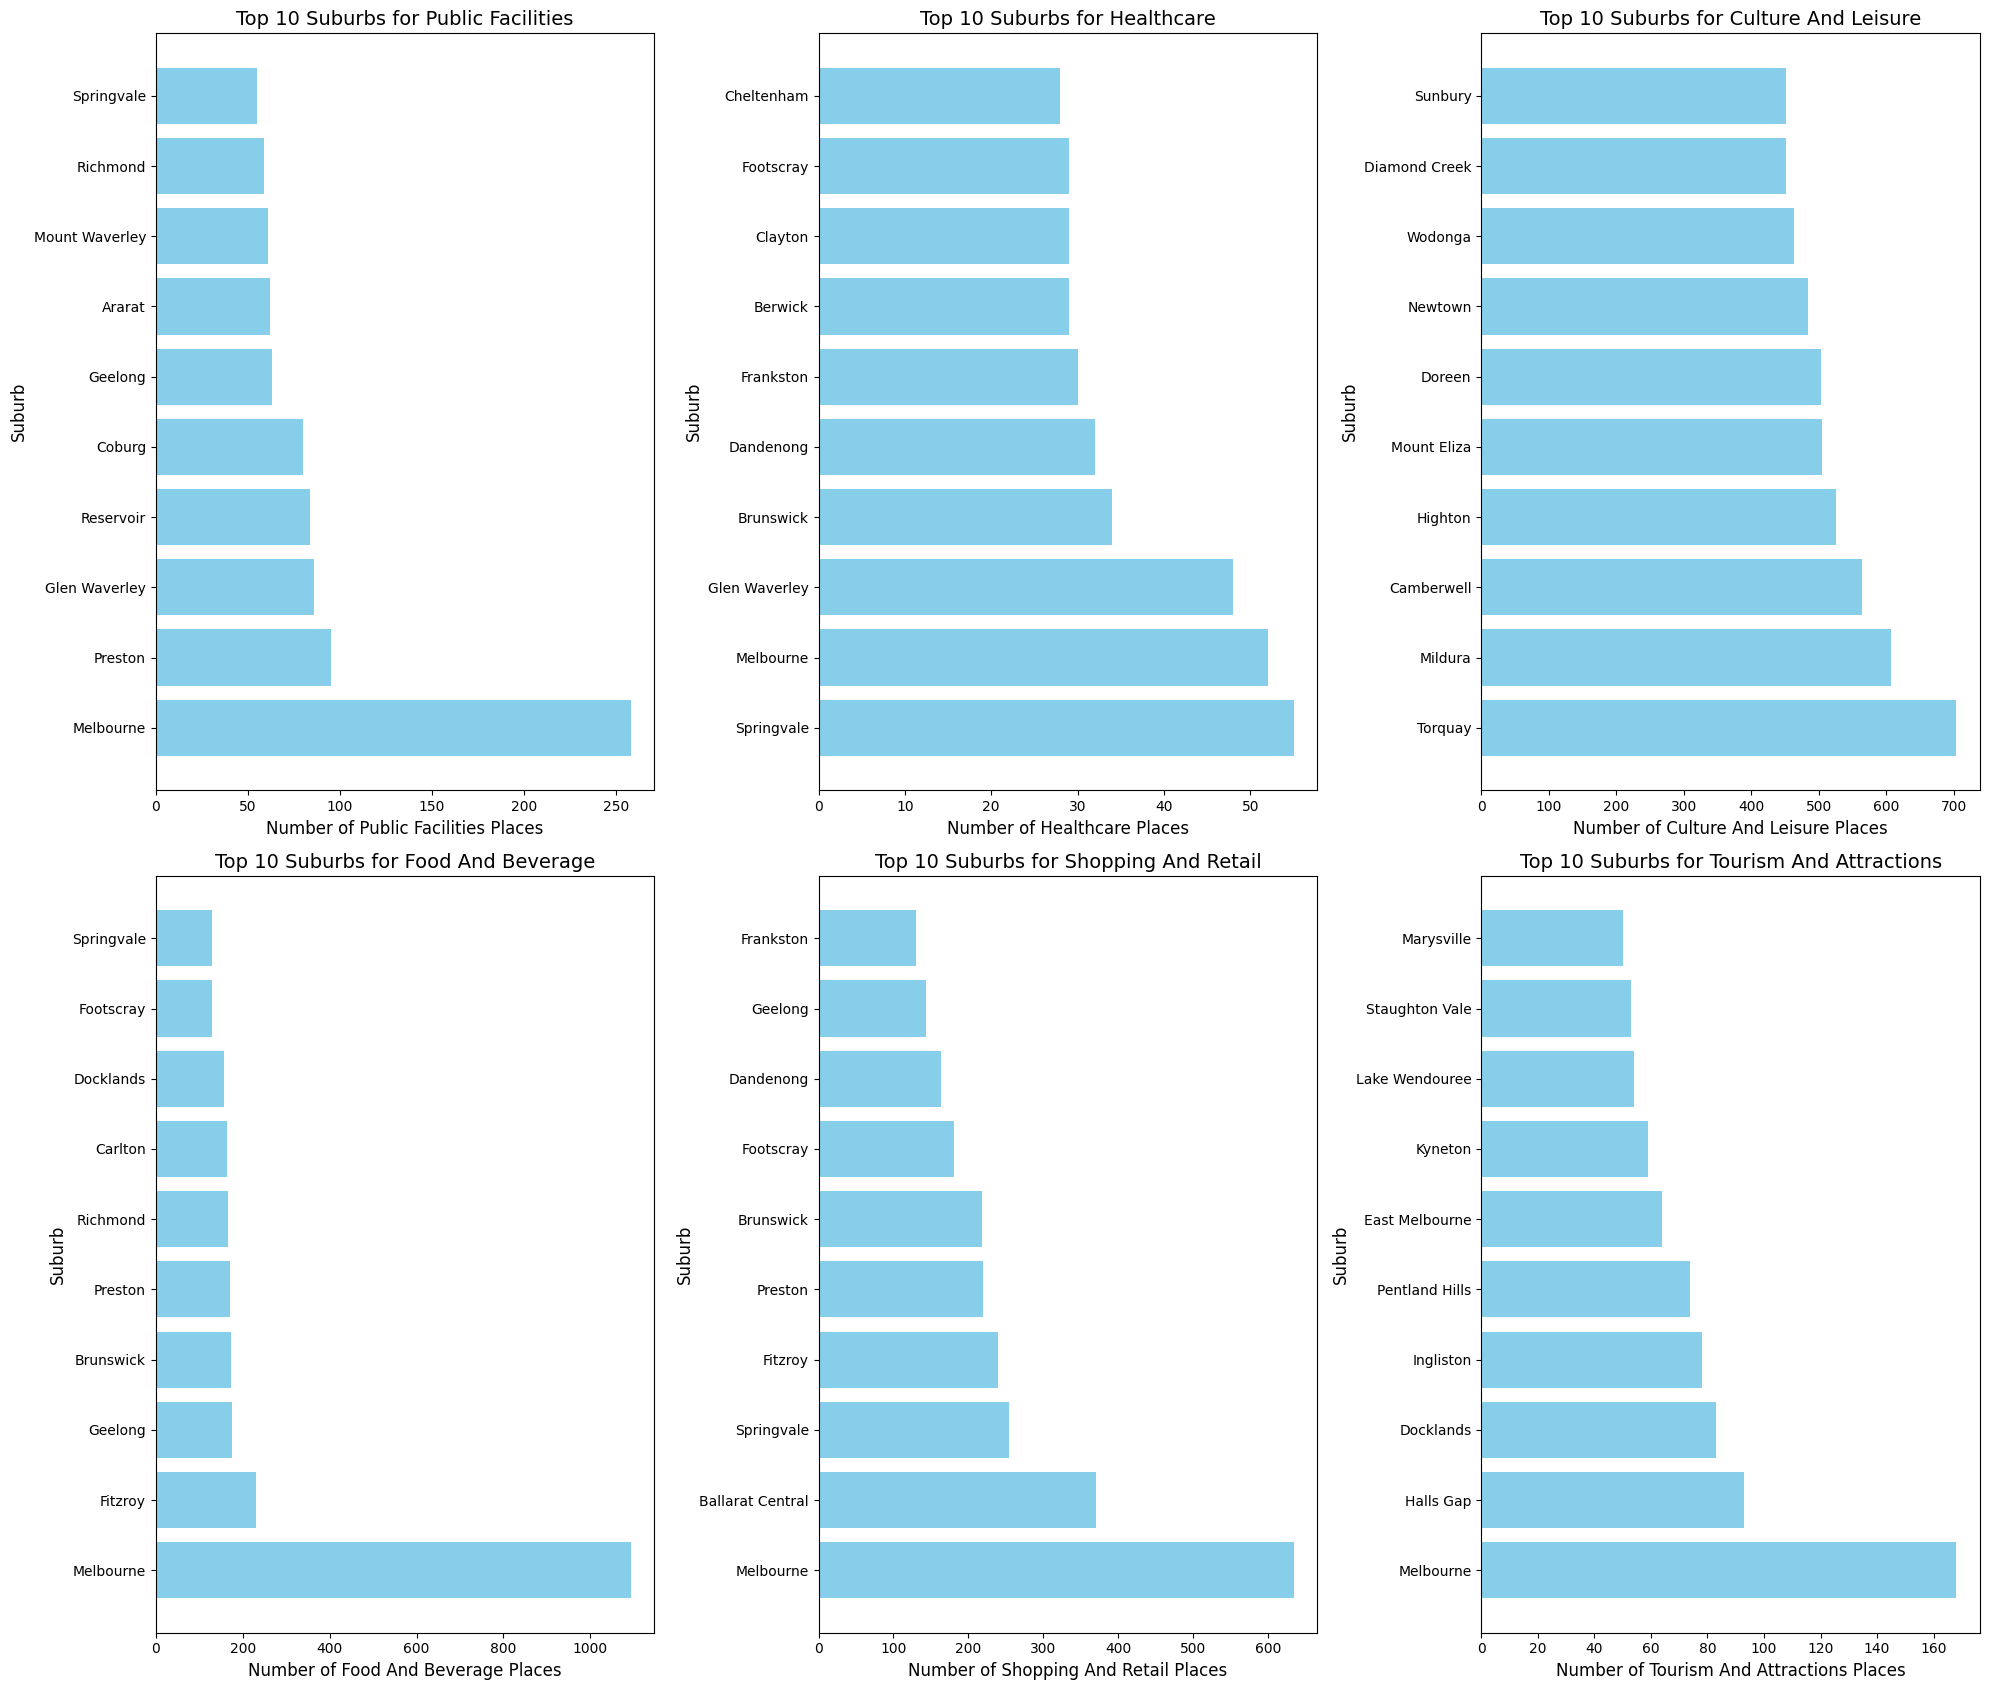

In [12]:
# Define the categories of interest
categories_of_interest = ['public_facilities', 'healthcare', 'culture_and_leisure', 
                          'food_and_beverage', 'shopping_and_retail', 
                          'tourism_and_attractions']

# Group the data by 'gazetted_locality' (suburb) and 'categories', then count occurrences
category_counts = pois_gdf[pois_gdf['categories'].isin(categories_of_interest)] \
    .groupby(['gazetted_locality', 'categories']) \
    .size() \
    .reset_index(name='count')

# For each category, find the top 10 suburbs with the highest counts
top_suburbs_per_category = category_counts.groupby('categories').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Plot the histogram for each category in a 2x3 grid (2 columns, 3 rows)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 17))
fig.subplots_adjust(hspace=0.7, wspace=0.5)  # Adjust spacing between plots

# Flatten the axs array to easily iterate over it
axs = axs.flatten()

for i, category in enumerate(categories_of_interest):
    # Get data for the current category
    data = top_suburbs_per_category[top_suburbs_per_category['categories'] == category]
    
    # Plot histogram with capitalized y-axis labels
    axs[i].barh(data['gazetted_locality'].apply(lambda x: x.title()), data['count'], color='skyblue')
    axs[i].set_title(f'Top 10 Suburbs for {category.replace("_", " ").title()}', fontsize=14)
    axs[i].set_xlabel(f'Number of {category.replace("_", " ").title()} Places', fontsize=12)
    axs[i].set_ylabel('Suburb', fontsize=12)

# Remove any unused subplots
for j in range(len(categories_of_interest), len(axs)):
    fig.delaxes(axs[j])

# Save the figure
plt.savefig(os.path.join('../../plots/urban_landmarks_visualisations', 'POIS_Vic.png'), bbox_inches='tight', pad_inches=0.25)

# Show the plot
plt.tight_layout()
plt.show()

---

### Correlation Analysis & Viusalisations

In [13]:
# Retain specific columns from all_properties
columns_to_retain = ['year', 'dec_median', 'jun_median', 'mar_median', 'sep_median']

# Get all columns from urban_landmarks except 'gazetted_locality' 
# that are also present in all_properties
columns_to_keep = urban_landmarks.columns.difference(['gazetted_locality']).intersection(all_properties.columns)

# Combine the columns to retain and the columns from urban_landmarks
combined_columns = list(columns_to_retain) + list(columns_to_keep)

# Filter all_properties to retain only these combined columns
filtered_all_properties = all_properties[combined_columns]

# Display the first few rows of the final filtered data
filtered_all_properties.head()

year  dec_median  jun_median  mar_median  sep_median  accommodation  beach  \
0  2016       450.0       450.0       450.0       450.0            4.0    1.0   
1  2017       480.0       460.0       450.0       465.0            4.0    1.0   
2  2018       490.0       480.0       480.0       480.0            4.0    1.0   
3  2019       500.0       500.0       495.0       500.0            4.0    1.0   
4  2020       460.0       495.0       500.0       480.0            4.0    1.0   

   cliff  commercial_areas  culture_and_leisure  ...  public_facilities  \
0    0.0              17.0                 31.0  ...               25.0   
1    0.0              17.0                 31.0  ...               25.0   
2    0.0              17.0                 31.0  ...               25.0   
3    0.0              17.0                 31.0  ...               25.0   
4    0.0              17.0                 31.0  ...               25.0   

   residential_areas  residential_roads  retail_areas  roads_mode  \
0               53.0              100.0          10.0           6   
1               53.0              100.0          10.0           6   
2               53.0              100.0          10.0           6   
3               53.0              100.0          10.0           6   
4               53.0              100.0          10.0           6   

   shopping_and_retail  spring  tourism_and_attractions  track  walking_paths  
0                 64.0     0.0                     18.0    3.0          165.0  
1                 64.0     0.0                     18.0    3.0          165.0  
2                 64.0     0.0                     18.0    3.0          165.0  
3                 64.0     0.0                     18.0    3.0          165.0  
4                 64.0     0.0                     18.0    3.0          165.0  

[5 rows x 47 columns]

In [14]:
# Create a correlation matrix for filtered_all_properties
correlation_matrix = filtered_all_properties.corr()

# Display the correlation matrix
correlation_matrix

year  dec_median  jun_median  mar_median  \
year                      1.000000e+00    0.464530    0.440277    0.427518   
dec_median                4.645300e-01    1.000000    0.987056    0.975380   
jun_median                4.402774e-01    0.987056    1.000000    0.995852   
mar_median                4.275182e-01    0.975380    0.995852    1.000000   
sep_median                4.964971e-01    0.951572    0.959876    0.955798   
accommodation            -4.546859e-14   -0.145166   -0.145391   -0.147437   
beach                    -3.066875e-14    0.239473    0.240102    0.237328   
cliff                     2.969562e-14   -0.009731   -0.010691   -0.012929   
commercial_areas         -5.227457e-14   -0.002168   -0.001606   -0.001171   
culture_and_leisure      -4.197950e-14    0.035274    0.035062    0.033297   
cycleway                 -1.019825e-14   -0.077978   -0.080771   -0.079054   
distance_to_fire_station -2.318023e-14   -0.299540   -0.305093   -0.307769   
distance_to_hospital     -4.427751e-14   -0.138509   -0.142089   -0.144753   
distance_to_hotel        -5.738112e-14   -0.126078   -0.127862   -0.131231   
distance_to_kindergarten -7.624330e-15   -0.078297   -0.080192   -0.080714   
distance_to_library      -3.507207e-15   -0.085019   -0.086033   -0.086976   
distance_to_mall          8.682232e-15   -0.123636   -0.128026   -0.129517   
distance_to_park         -5.835037e-14   -0.210750   -0.217257   -0.220318   
distance_to_police       -5.787801e-14   -0.234574   -0.239721   -0.242811   
distance_to_restaurant   -7.001532e-14   -0.076543   -0.080597   -0.082511   
distance_to_supermarket  -1.702805e-14   -0.187109   -0.194375   -0.196365   
farmland                 -2.693003e-14   -0.177927   -0.178250   -0.178945   
financial_institutions    1.849901e-14    0.067772    0.071121    0.070151   
food_and_beverage        -4.225844e-15    0.127596    0.131959    0.132155   
forest                    1.864882e-14   -0.106967   -0.110998   -0.111660   
healthcare                1.878210e-14    0.069072    0.069298    0.068873   
industrial_areas         -8.046993e-14   -0.234972   -0.237600   -0.238315   
landuse_mode              2.394499e-14    0.152308    0.155185    0.156501   
main_roads               -3.603688e-14   -0.033823   -0.034777   -0.034020   
motorway                 -6.441279e-14   -0.100785   -0.104001   -0.102468   
nature_mode               4.446150e-14   -0.108015   -0.111622   -0.112194   
nature_reserve            3.180931e-15   -0.204448   -0.209281   -0.212617   
park                     -1.140344e-14   -0.066597   -0.069589   -0.068546   
peak                     -9.681679e-15   -0.130362   -0.133198   -0.133494   
pofw_count               -5.271536e-14   -0.036735   -0.037382   -0.037678   
pofw_mode                -2.401701e-14    0.114695    0.115788    0.116689   
pois_mode                 3.809090e-14    0.012605    0.013917    0.014093   
public_facilities        -8.211858e-15    0.050455    0.052789    0.052953   
residential_areas        -2.506230e-14   -0.062366   -0.063052   -0.065079   
residential_roads        -3.180697e-14   -0.141878   -0.146302   -0.147034   
retail_areas              5.037966e-15    0.102423    0.101785    0.101231   
roads_mode                2.861824e-14    0.056043    0.059953    0.062930   
shopping_and_retail       3.331019e-15    0.040868    0.043028    0.042783   
spring                             NaN         NaN         NaN         NaN   
tourism_and_attractions  -3.002629e-14    0.050024    0.054837    0.053262   
track                    -2.136034e-14   -0.225526   -0.228635   -0.230941   
walking_paths             8.406993e-15   -0.000967   -0.000188    0.001666   

                          sep_median  accommodation         beach  \
year                        0.496497  -4.546859e-14 -3.066875e-14   
dec_median                  0.951572  -1.451662e-01  2.394729e-01   
jun_median                  0.959876  -1.453909e-01  2.401016e-01   
mar_median   

Correlation Matrix Heat Map

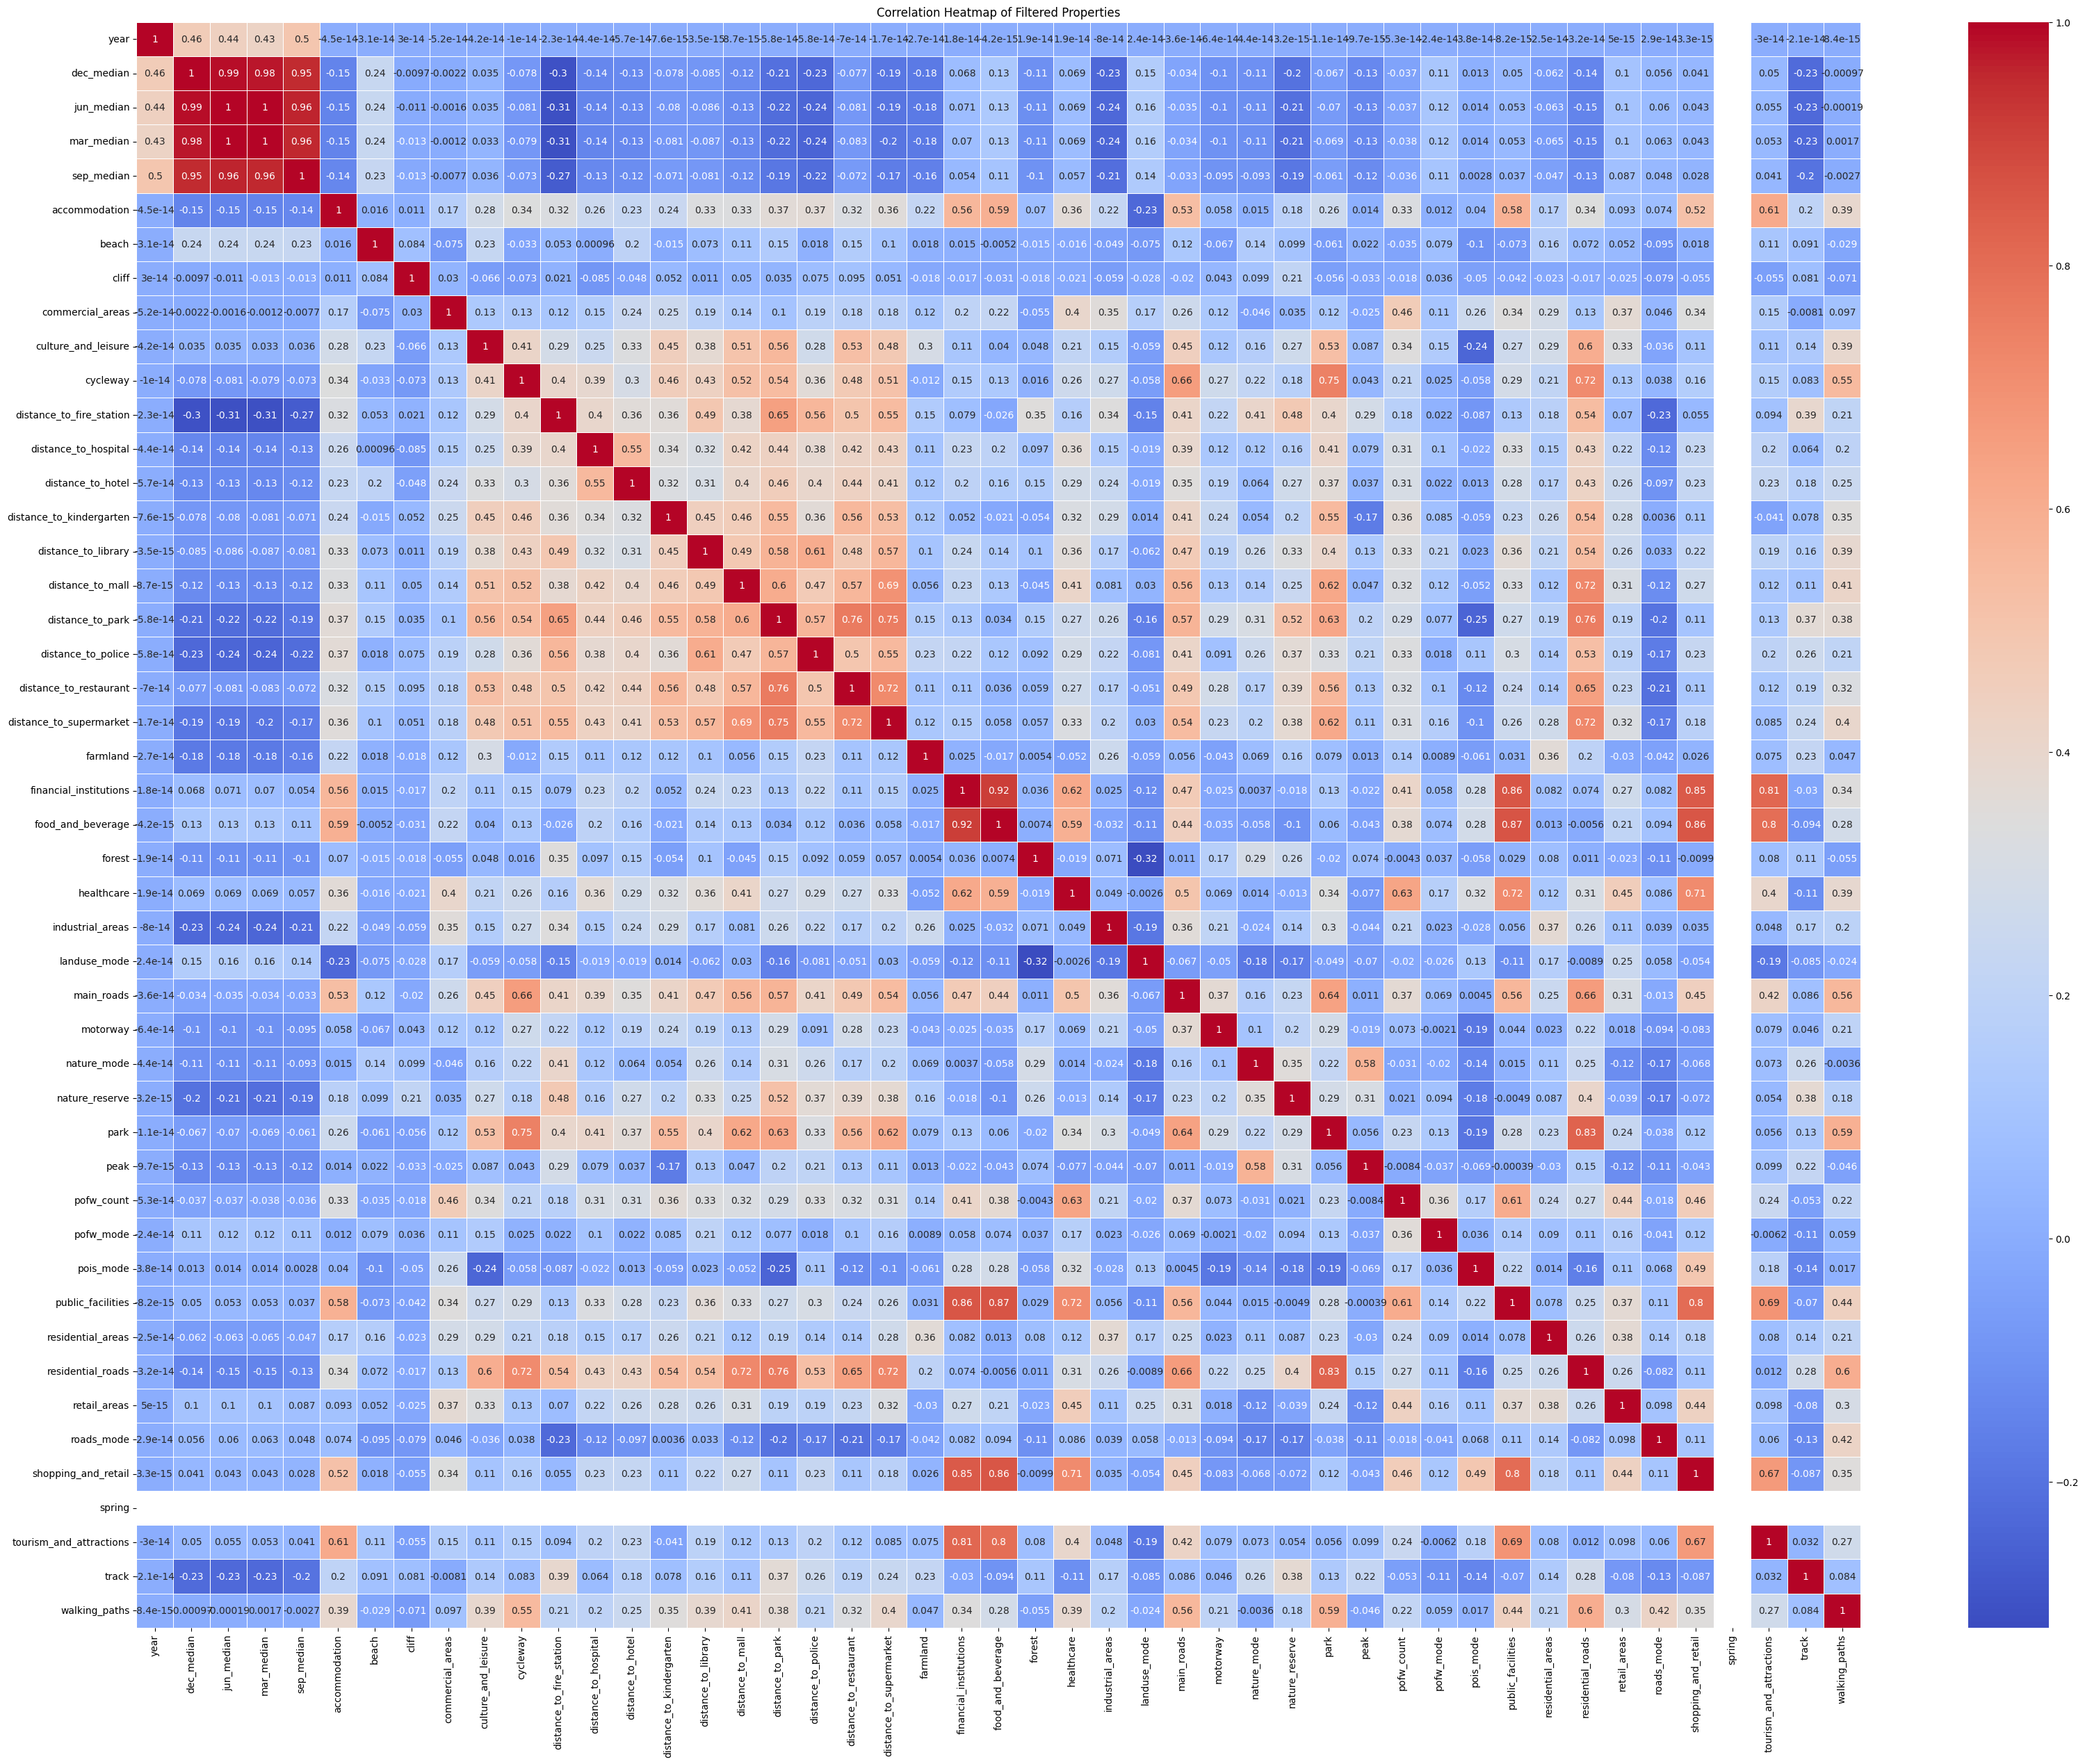

In [15]:
# Create a correlation matrix for filtered_all_properties
correlation_matrix = filtered_all_properties.corr()

# Plot the heatmap
plt.figure(figsize=(40, 30))  # Adjust the size as necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Filtered Properties')

# Show the plot
plt.show()

Correlation Matrix Heatmap for Features with Correlation Greater Than 0.16

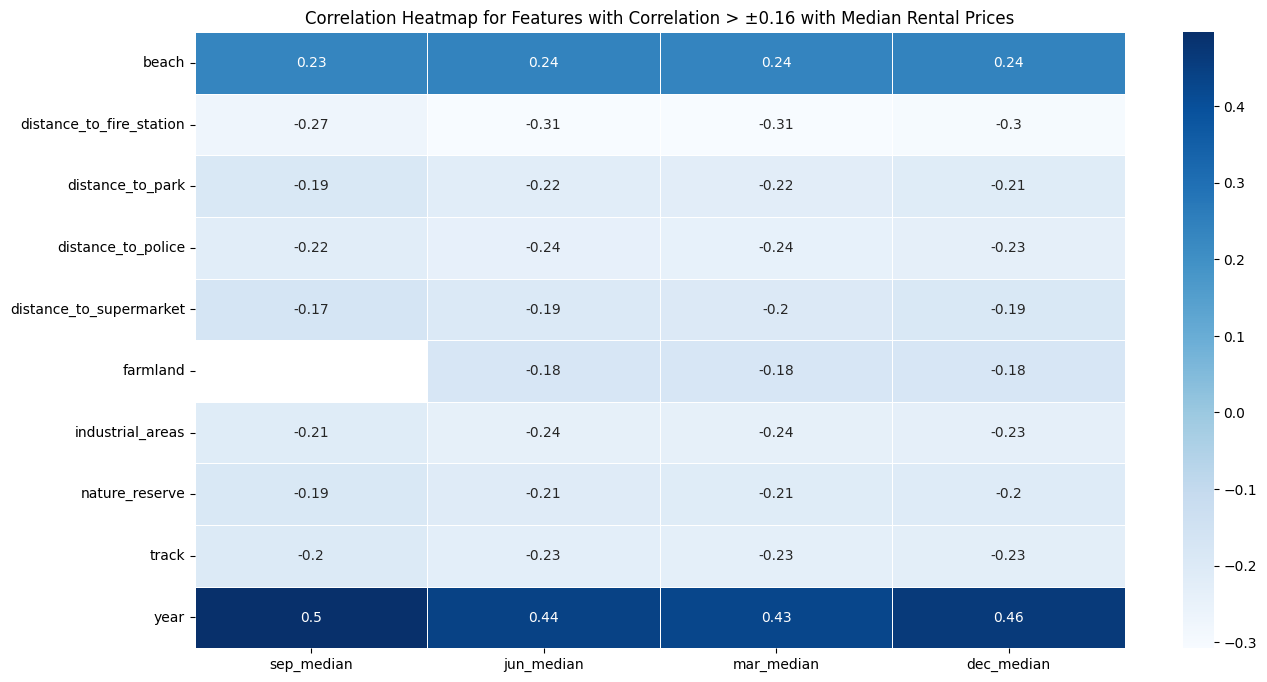

In [16]:
# Create a correlation matrix for specific columns of interest
cols_of_interest = ['sep_median', 'jun_median', 'mar_median', 'dec_median']
correlation_matrix = filtered_all_properties.corr()

# Filter out features that have correlation greater than ±0.16 with the cols_of_interest
filtered_corr = correlation_matrix[cols_of_interest].apply(lambda x: x[(x > 0.16) | (x < -0.16)])

# Drop any rows where the correlation is with itself (diagonal correlations)
filtered_corr = filtered_corr.drop(index=cols_of_interest, errors='ignore')

# Drop any rows with all NaN values (no correlations > ±0.16)
filtered_corr = filtered_corr.dropna(how='all')

# Plot the heatmap of filtered features
plt.figure(figsize=(15, 8))  # Adjust size as necessary
sns.heatmap(filtered_corr, annot=True, cmap='Blues', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap for Features with Correlation > ±0.16 with Median Rental Prices')

# Save the figure
plt.savefig(os.path.join('../../plots/urban_landmarks_visualisations', 'Corr_rental_prices_filtered.png'), bbox_inches='tight', pad_inches=0.25)

# Show the plot
plt.show()
